# Visualization

In [2]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")

## room_type

https://www.kaggle.com/code/oleksandrpustovoi/airbnb-catboost-v1

In [ ]:
# Function to plot catplot graphs
def plot_catplot(h,v,he,a):
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)

plot_catplot("room_type","count",5,2)

## cancellation_policy

In [ ]:
plot_catplot("cancellation_policy","count",5,3)

plot_piechart("room_type") #pasta grafik

In [ ]:
plot_catplot("room_type", "count", 5, 2)   
#sutun grafik ile datadaki room_type i karsilastirmis

In [ ]:
plot_catplot("city","count", 5, 2)
#sehirlerdeki ev sayilarini karsilastirmis

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

#sehirlerdeki ev sayilarini pasta grafikle karsilastirmis

LANGITUDE/latitude

In [ ]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

'ENLEM BOYLAMIN YANI KONUMUN FIYATA ETKISI'
' https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb'

In [ ]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()


'ENLEM BOYLAMIN YANI KONUMUN FIYATA ETKISI'
' https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb'

NAME

In [ ]:
#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in airbnb.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)
        
# name sutunundaki kelimeleri incelemis
#' https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb'


In [ ]:
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [ ]:
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

In [ ]:
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

log_prize

In [ ]:
import seaborn as sns
#histogram and normal probability plot
sns.distplot(data['log_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['log_price'], plot=plt)
#skewness and kurtosis
print("Skewness: %f" % data['log_price'].skew())
print("Kurtosis: %f" % data['log_price'].kurt())

#log_prize in histogram ile norrmal dagilimina bakmis .ayrica probablty plot ile de incelemis 

bed_type 

In [ ]:
df['bed_type'].value_counts().sort_values(ascending=False).plot(kind='bar');

heatmap

In [ ]:
num_attributes = df6.select_dtypes(include=['int64', 'float'])
corr = num_attributes.corr(method='pearson').corr() # Pearson Corr
mask = np.triu(corr) # Cleaner heatmap - Only plotting the lower triangle

plt.figure(figsize=(20,10)) # Heatmap size
sns.heatmap(corr, annot=True, mask=mask);

# https://github.com/brunodifranco/project-airbnb-classification/blob/main/airbnb.ipynb

An interesting technique to use whenever categorical variable have many unique values is to check whether some variables have high correlation from one to another. It can be done via Cramér's V correlation matrix: 

In [ ]:
df6_cat_att = df6.select_dtypes(exclude=['int64', 'float', 'datetime64[ns]'])
cramers_v_heatmap(df6_cat_att)

            ###NEIGHBORHOOD

In [ ]:
data = df.neighbourhood.value_counts()[:65]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

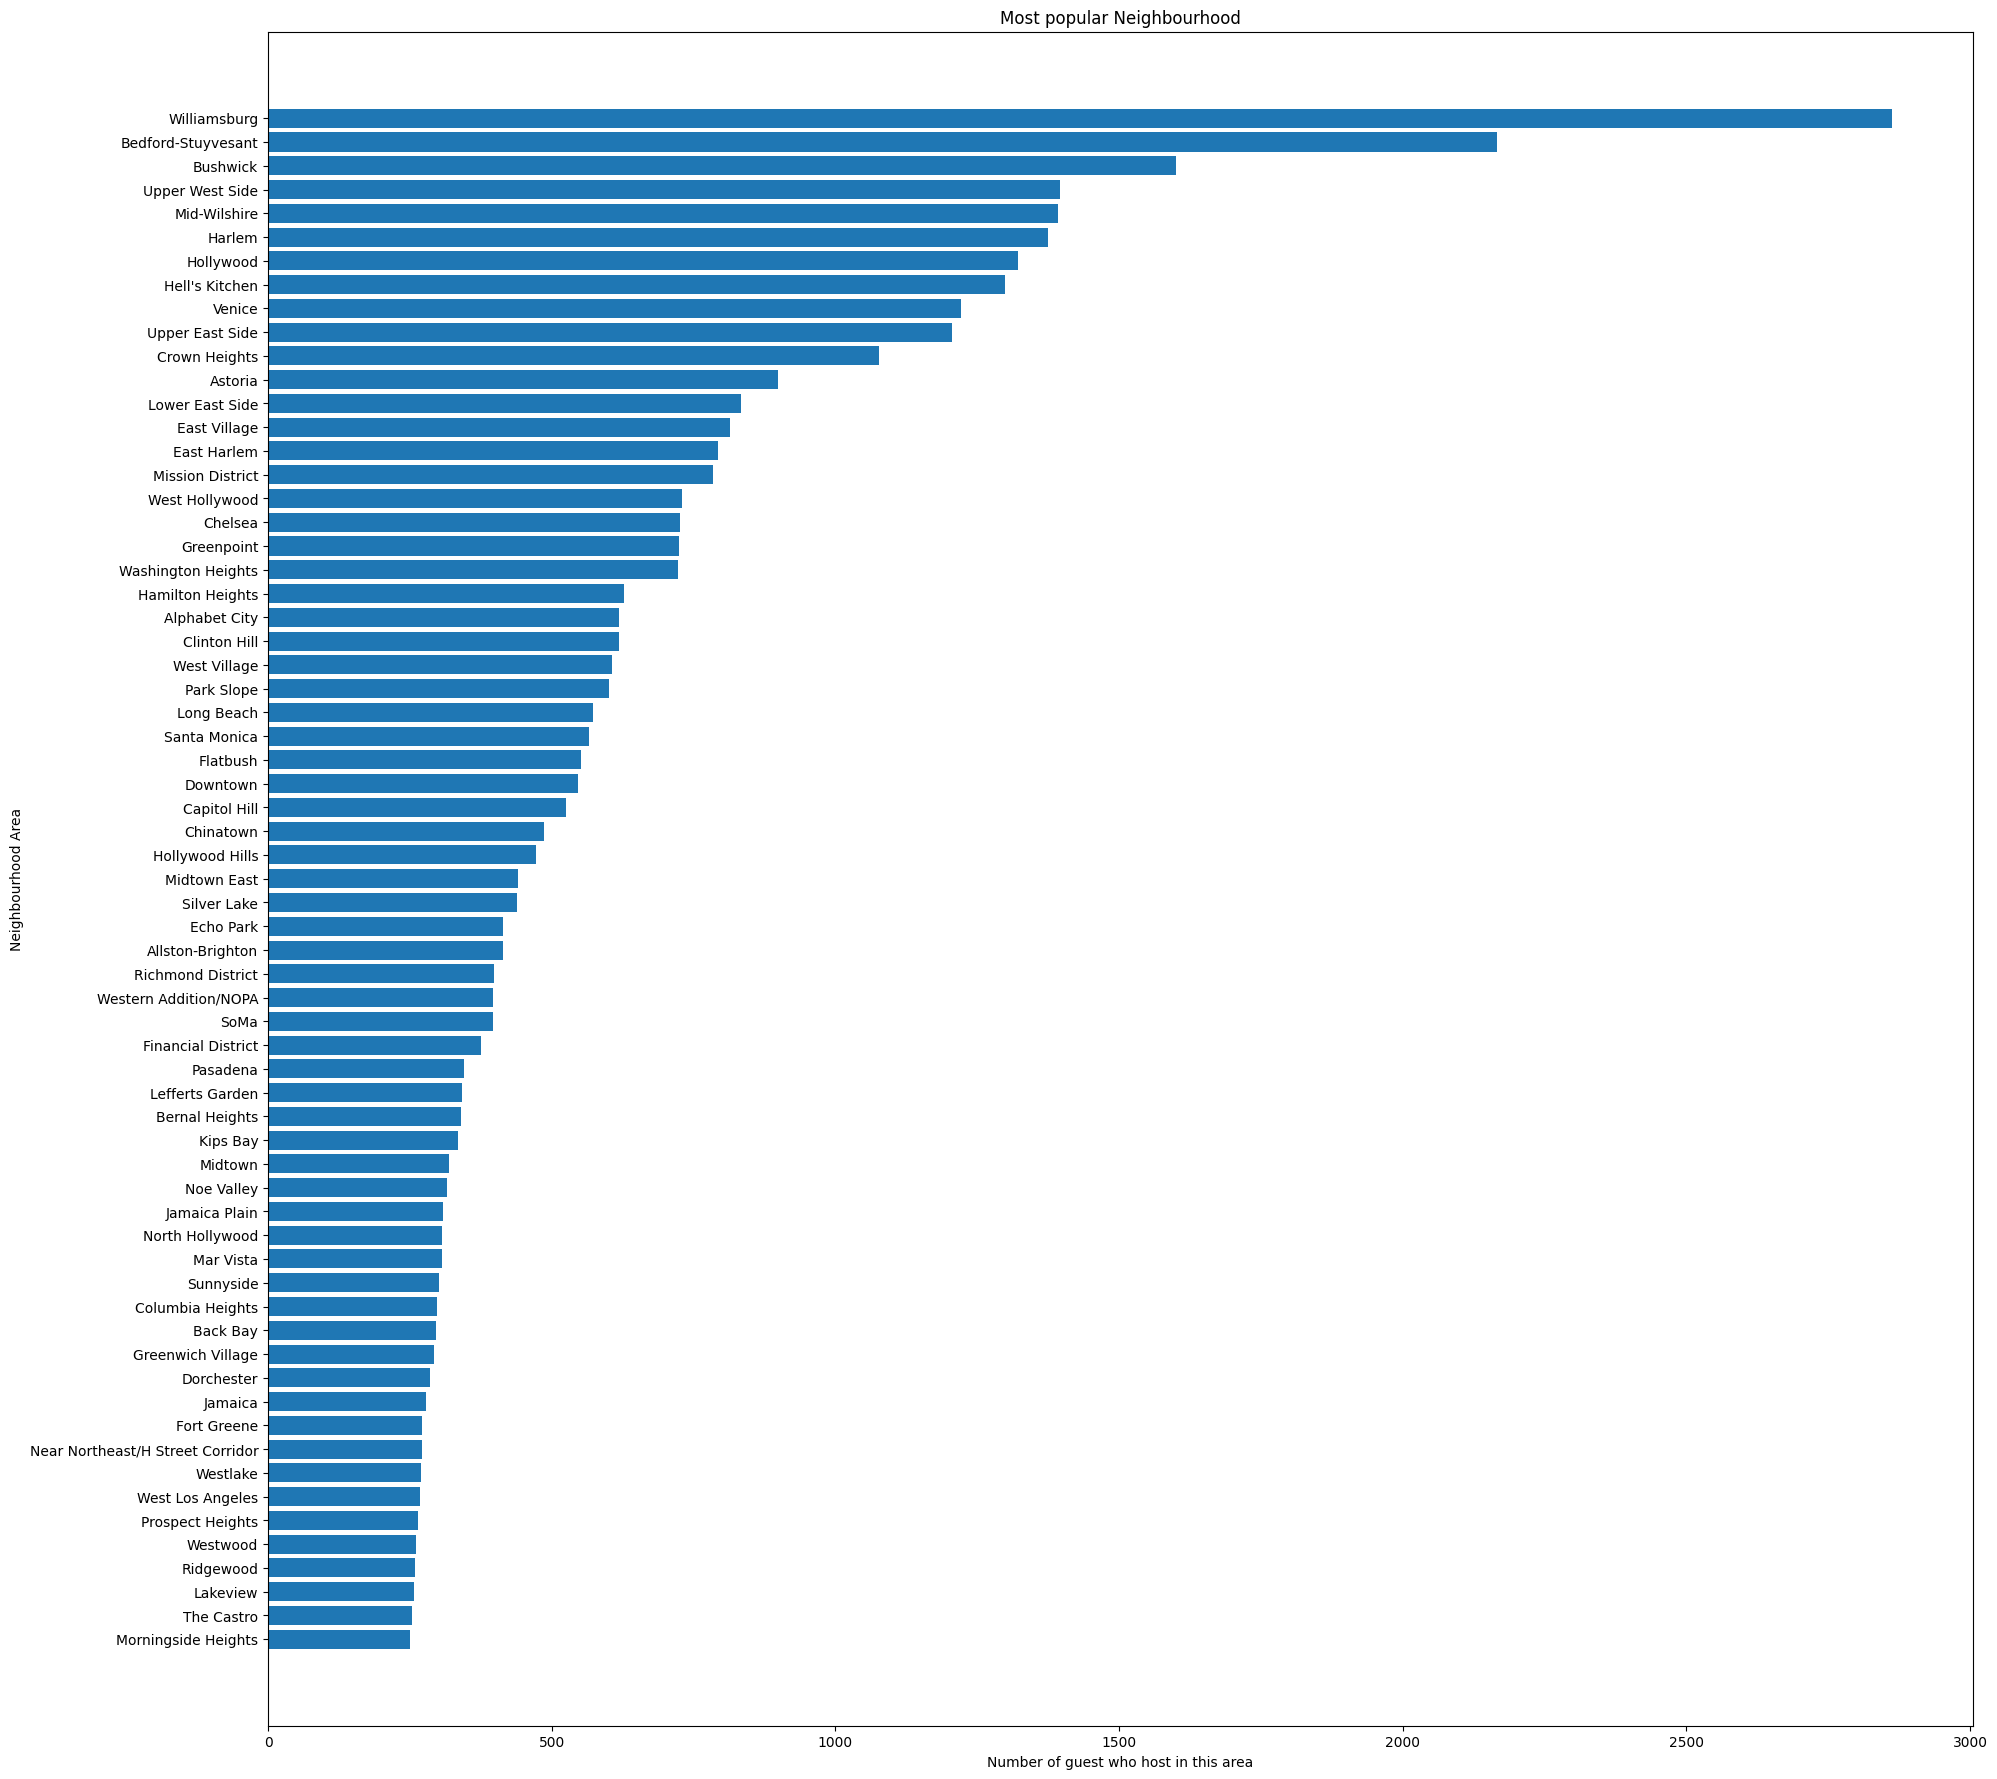

In [ ]:
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud


mpl.rcParams['figure.figsize']=(15,15) 
mpl.rcParams['font.size']=20  

wordcloud = WordCloud(    background_color='white',
                          max_words=500,
                          max_font_size=100, 
                          random_state=1
                         ).generate(str(df['description']))

fig1 = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

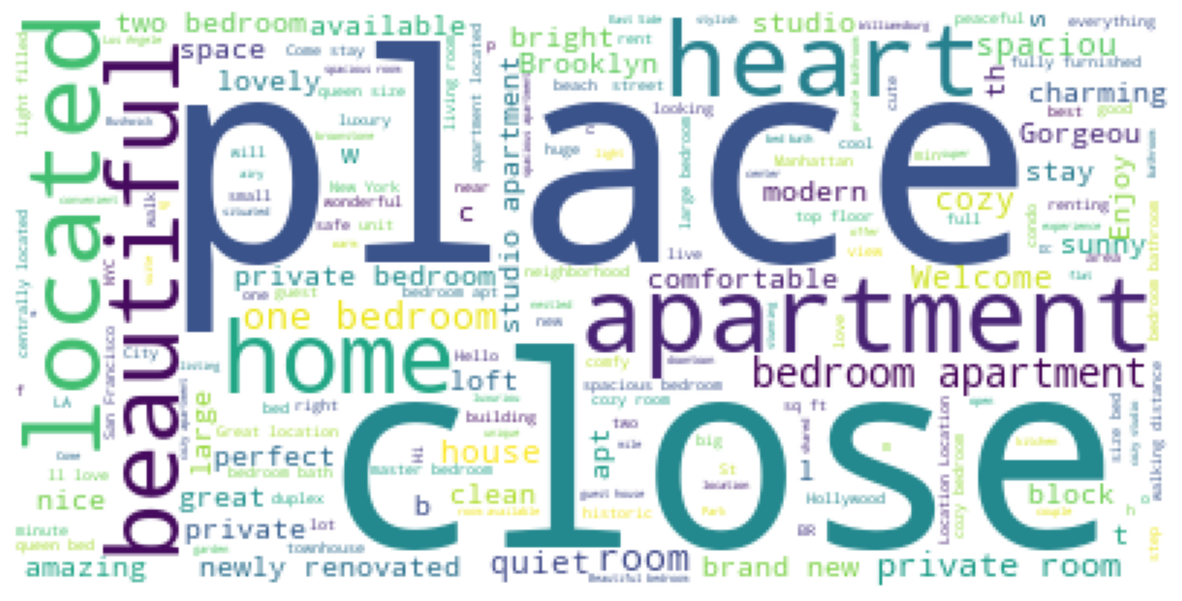